In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('SalaryData.csv')#, delimiter=';', decimal=',', encoding='latin-1')

In [3]:
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [6]:
df['YearsExperience'].head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [7]:
print(type(df['YearsExperience'][0]))

<class 'numpy.float64'>


In [8]:
df['Salary'].head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [9]:
print(type(df['Salary'][0]))

<class 'numpy.float64'>


## Parte 1

In [10]:
# 1. Salario promedio

promedio = sum(df['Salary']) / len(df['Salary'])

print("Salario promedio = ", promedio)

Salario promedio =  76003.0


In [7]:
df['YearsExperience'].mean()

5.3133333333333335

In [11]:
# 2. Mediana

mediana = df['Salary'].median()

print("La mediana es = ", mediana)

La mediana es =  65237.0


In [8]:
df['YearsExperience'].median()

4.7

In [19]:
# 3. Salario más común = moda

moda = df['Salary'].mode()
if len(moda) == len(df['Salary']):
    print('No se repite ningún salario')
else:
    print("El salario más común es = ", moda)

No se repite ningún salario


In [20]:
# 4. Variación de los precios respecto al promedio = varianza

varianza = df['Salary'].var()

print("La varianza es = ", varianza)
print("Y el desvío estándar es = ", np.sqrt(varianza))

La varianza es =  751550960.4137931
Y el desvío estándar es =  27414.4297845823


In [11]:
df['YearsExperience'].std()

2.8378881576627184

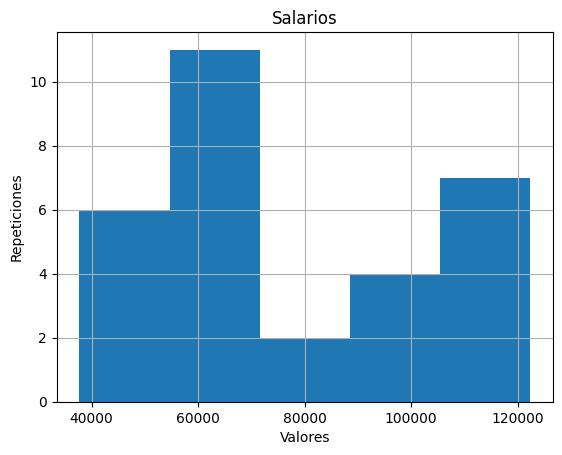

In [25]:
# 5. Histograma

import matplotlib.pyplot as plt

plt.hist(df['Salary'], bins=5)
plt.grid(True)
plt.title("Salarios")
plt.xlabel("Valores")
plt.ylabel("Repeticiones")
plt.show()


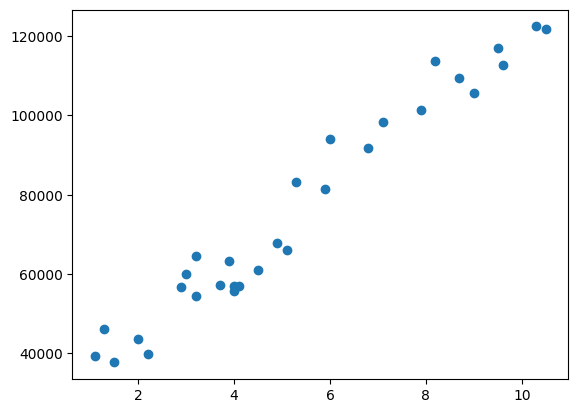

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'])

In [37]:
correlacion = df.corr(method='pearson')
print(correlacion)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


## Parte 2

m = [9449.96232146]
b = [25792.20019867]


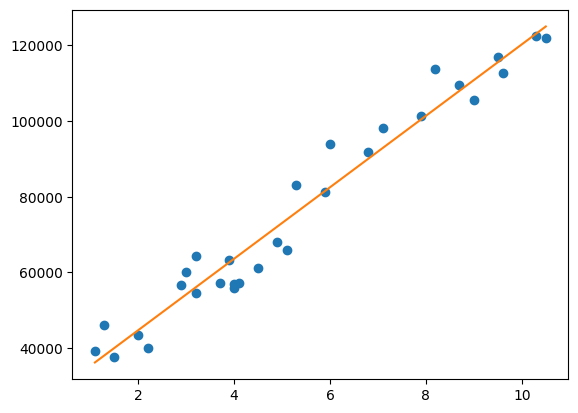

y = [9449.96232146]x + [25792.20019867]


In [42]:
from sklearn.linear_model import LinearRegression

# Extraer variables de entrada (todas las filas, todas las columnas menos la última)
X = df.values[:, :-1]
#print(X)

# Extraer columna de salida (todas las filas, última columna)
Y = df.values[:, -1]
#print(Y)

# Ajustar una línea a los puntos
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print(f"m = {m}")
print(f"b = {b}")

# mostrar en gráfico
plt.plot(X, Y, 'o')  # diagrama de dispersión
plt.plot(X, m*X+b)  # línea
plt.show()

print(f"y = {m}x + {b}")

Ecuación de la recta: 
$$ y = mx+b$$
reemplazando
$$ y = 9449.96x+25792.2$$

In [35]:
x_7 = 7
y_7 = m * x_7 + b
print('El salario para una persona con 7 años de experiencia es: ', y_7)

El salario para una persona con 7 años de experiencia es:  [91941.93644885]


In [33]:
x_0 = 0
y_0 = m * x_0 + b
print('El salario para una persona con 0 años de experiencia es: ', y_0)

El salario para una persona con 0 años de experiencia es:  [25792.20019867]


## Parte 3

Función costo
$$ C = (\hat{y}-y)^2 $$
siendo $\hat{y}$ el valor estimado e $y$ el valor real

In [44]:
# Descenso de gradiente

X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

n = df.shape[0]  # filas

# Construyendo el modelo
m_2 = 0.0
b_2 = 0.0

tamanio_muestra = 1  # tamaño de la muestra
L = .0001  # La tasa de aprendizaje
epochs = 1_000_000  # Número de iteraciones para realizar descenso de gradiente

# Realizando Descenso de Gradiente Estocástico
for i in range(epochs):
    idx = np.random.choice(n, tamanio_muestra, replace=False)
    x_muestra = X[idx]
    y_muestra = Y[idx]

    # El valor actual predicho de Y
    Y_pred = m_2 * x_muestra + b_2

    # Derivada d/dm de la función de pérdida
    D_m = (-2 / tamanio_muestra) * sum(x_muestra * (y_muestra - Y_pred))

    # Derivada d/db de la función de pérdida
    D_b = (-2 / tamanio_muestra) * sum(y_muestra - Y_pred)
    m_2 = m_2 - L * D_m  # Actualizar m
    b_2 = b_2 - L * D_b  # Actualizar b

    # imprimir progreso
    if i % 100000 == 0:
        print(i, m_2, b_2)

print(f"y = {m_2}x + {b_2}")

0 34.8448 10.889000000000001
100000 9494.251304575568 25426.97996231142
200000 9393.836389883187 25791.17980010499
300000 9464.272369286955 25768.75047867186
400000 9496.642674280441 25818.35959281654
500000 9352.649486736798 25833.05401734387
600000 9431.6673950431 25793.026993689662
700000 9458.35563547344 25738.597969506125
800000 9377.925808731336 25802.217493440763
900000 9518.174665489581 25816.08889538606
y = 9454.65862121665x + 25742.11832784748


Ecuación de la recta: 
$$ y = mx+b$$
reemplazando
$$ y = 9454.65x+25742.11$$

In [45]:
x_7 = 7
y_7 = m_2 * x_7 + b_2
print('El salario para una persona con 7 años de experiencia es: ', y_7)

El salario para una persona con 7 años de experiencia es:  91924.72867636403


In [46]:
x_0 = 0
y_0 = m_2 * x_0 + b_2
print('El salario para una persona con 0 años de experiencia es: ', y_0)

El salario para una persona con 0 años de experiencia es:  25742.11832784748
